In [29]:
from math import log, sqrt, sin, cos, e, pi, exp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
from matplotlib.animation import FuncAnimation

## Линейное уравнение переноса
$$
\begin{cases} 
    \frac{\partial f}{\partial t} + a\frac{\partial f}{\partial x} = 0, a > 0 \\
     \text{При } t = 0: f = f_0(x) > 0, x \in [0, L] \\
     \text{При } x = 0: f = f_1 = const
\end{cases}$$

In [57]:
a = 1    # > 0
f1 = 5

dx = 0.03
dt = 0.03

N = 50
T = 40

In [58]:
sigma = a*dt/dx
print("Число Куранта = ", sigma)

Число Куранта =  1.0


### Схема Лакса

In [59]:
f = np.zeros((T,N))

for n in range(-1, T-1):
    f[n+1][0] = f1
    for i in range(1, N-1):
        A = f[n][i-1]
        B = f[n][i+1]
        f[n+1][i] = (B+A)/2 - sigma/2 * (B-A)
    f[n+1][N-1] = f[n][N-2]

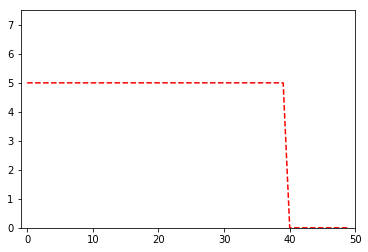

In [62]:
fig, ax = plt.subplots()
xdata, ydata = range(N), []
ln, = plt.plot([], [], color = 'r', linestyle = '--')

def init():
    ax.set_xlim(-1, N)
    ax.set_ylim(0, f1*1.5)
    return ln,

def update(t):
    ydata = f[t]
    ln.set_data(xdata, ydata)
    return ln,

anim = FuncAnimation(fig, update, frames=range(T), init_func=init, blit=True)
HTML(anim.to_html5_video())

### Схема Лакса - Вендрофа